# Important:

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ('flight-delays-fall-2018:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F12176%2F210239%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240917%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240917T214709Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da6b40310faba2dabbd394bcaed63c24190d59e697c75b560a61af79d62e4a7deef1c872b184d2d25d7d606aeef0d89def522e3a11a5c2933e1839618a46cc68b9bba7caeba2ca58e5047a2c1164b285e691e3cabba13200a8d7b57e837d0269cec2b5408e453df0bc77b087f89818a73e1e54428fd8aeaae5e9a67c57675ca97431792e506de0c7a5990fd9c7271157d5a5b309f37bd1fd8d66791e72aa0c98e3c264c63b9890e5503b1ffebcdaf872e5625aa6234be8dde3d4a19769f5195c507e6a8b8c28d321db7c193a55036e4c800ac612faefc693df6938c87afd32f9cc68d6951cfe04ecf499594cf1b54686385bdebbcea47e7ce0cd841269417c46a'
                        'airline-delay-and-cancellation-data-2009-2018:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F297485%2F609497%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240918%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240918T192028Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D741d372ac6621471401a2c442e73c1ac4a373d31a41110ff4f36e8ded526f11661074a3d75e028df3f546bc8926a941573d09d40254cb3b65e7a01cb892a584ed10afbe01487d5000f027240c27e8fdf798a9227c5b402467ca2ba3a16d5ad494707534d58152b0aef666d16ee9c3f8b14e0be8c7383394effa8ea234af00417761b7c3e8c0880e8b41aec4d5dcacd5a95db6a15138f0a0bb1b09d5ba373e9464e3a6f437f0c43078eec1aa944b8865316d54f2162b0f88131dc0b68fbbc7d9847285390e86a36b02881d9b283ba131cf4d9957dac936a7f4ca621a52f9395a616b44ae60bb02bbd01551f07e0663ba54254b7c2fdd9d5d73541ecb8aef79ae2'
                        )
KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


ValueError: too many values to unpack (expected 2)

In [ ]:
# !pip install scikit-learn --upgrade
# !pip install xgboost --upgrade
!pip install linearboost -q
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [ ]:
!pip list | grep xgboost

xgboost                          2.1.1


In [ ]:
!pip list | grep sklearn

sklearn-pandas                   2.2.0


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from linearboost import LinearBoostClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


/kaggle/input/flight-delays-fall-2018/flight_delays_train.csv.zip
/kaggle/input/flight-delays-fall-2018/flight_delays_test.csv.zip
/kaggle/input/flight-delays-fall-2018/sample_submission.csv.zip


In [ ]:
train = pd.read_csv("../input/flight-delays-fall-2018/flight_delays_train.csv.zip", compression='zip')
test = pd.read_csv("../input/flight-delays-fall-2018/flight_delays_test.csv.zip", compression='zip')


In [ ]:
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [ ]:
test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [ ]:
train.info()
print('-'*45)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Month          100000 non-null  object
 1   DayofMonth     100000

In [ ]:
train.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [ ]:
# list of columns with missing values apart from target within test set
train.columns[train.isna().any()]

Index([], dtype='object')

In [ ]:
all_data = pd.concat([train, test], ignore_index=True, sort=False)

In [ ]:
# change target name to make it easier
train = train.rename(columns={'dep_delayed_15min':'delayed'})
all_data = all_data.rename(columns={'dep_delayed_15min':'delayed'})

In [ ]:
# change target to numerical N-->0 & Y-->1
train.loc[(train.delayed == 'N'), 'delayed'] = 0
train.loc[(train.delayed == 'Y'), 'delayed'] = 1
all_data.loc[(all_data.delayed == 'N'), 'delayed'] = 0
all_data.loc[(all_data.delayed == 'Y'), 'delayed'] = 1

# Testing in Huge Dataset:

In [ ]:
# Load file (this machine can't handle more)
# df = pd.read_csv("/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2015.csv")

In [ ]:
# Let's get familiar with the dataset
df.info()


In [ ]:
df.head()

# Feature Engineering

In [ ]:
train.Month = train.Month.str.slice(start=2).astype(int)
all_data.Month = all_data.Month.str.slice(start=2).astype(int)

train.DayofMonth = train.DayofMonth.str.slice(start=2).astype(int)
all_data.DayofMonth = all_data.DayofMonth.str.slice(start=2).astype(int)

train.DayOfWeek = train.DayOfWeek.str.slice(start=2).astype(int)
all_data.DayOfWeek = all_data.DayOfWeek.str.slice(start=2).astype(int)

all_data['Route'] = all_data['Origin'] + all_data['Dest']

all_data['UniqueCarrier_Origin'] = all_data['UniqueCarrier'] + "_" + all_data['Origin']
all_data['UniqueCarrier_Dest'] = all_data['UniqueCarrier'] + "_" + all_data['Dest']

all_data['is_weekend'] = (all_data['DayOfWeek'] == 6) | (all_data['DayOfWeek'] == 7)

# Hour and minute
all_data['hour'] = all_data['DepTime'] // 100
all_data.loc[all_data['hour'] == 24, 'hour'] = 0
all_data.loc[all_data['hour'] == 25, 'hour'] = 1
all_data['minute'] = all_data['DepTime'] % 100

# give more importance to hour variable
all_data['hour_sq'] = all_data['hour'] ** 2
all_data['hour_sq2'] = all_data['hour'] ** 4

all_data['summer'] = (all_data['Month'].isin([6, 7, 8]))
all_data['autumn'] = (all_data['Month'].isin([9, 10, 11]))
all_data['winter'] = (all_data['Month'].isin([12, 1, 2]))
all_data['spring'] = (all_data['Month'].isin([3, 4, 5]))

all_data['DayTime'] = 0
all_data['DayTime'] = all_data['DayTime'].astype(object)
all_data.loc[all_data.DepTime <= 600 , 'DayTime'] = 'Night'
all_data.loc[(all_data.DepTime > 600) & (all_data.DepTime <= 1200), 'DayTime'] = 'Morning'
all_data.loc[(all_data.DepTime > 1200) & (all_data.DepTime <= 1800), 'DayTime'] = 'Afternoon'
all_data.loc[(all_data.DepTime > 1800) & (all_data.DepTime <= 2600), 'DayTime'] = 'Evening'

all_data['DepTime_bin'] = 0
all_data['DepTime_bin'] = all_data['DepTime_bin'].astype(object)
all_data.loc[all_data.DepTime <= 600 , 'DepTime_bin'] = 'vem'
all_data.loc[(all_data.DepTime > 600) & (all_data.DepTime <= 900), 'DepTime_bin'] = 'm'
all_data.loc[(all_data.DepTime > 900) & (all_data.DepTime <= 1200), 'DepTime_bin'] = 'mm'
all_data.loc[(all_data.DepTime > 1200) & (all_data.DepTime <= 1500), 'DepTime_bin'] = 'maf'
all_data.loc[(all_data.DepTime > 1500) & (all_data.DepTime <= 1800), 'DepTime_bin'] = 'af'
all_data.loc[(all_data.DepTime > 1800) & (all_data.DepTime <= 2100), 'DepTime_bin'] = 'n'
all_data.loc[(all_data.DepTime > 2100) & (all_data.DepTime <= 2400), 'DepTime_bin'] = 'nn'
all_data.loc[all_data.DepTime > 2400, 'DepTime_bin'] = 'lm'
all_data = all_data.drop(['DepTime'], axis=1)


all_data['Dist_bin'] = 0
all_data['Dist_bin'] = all_data['Dist_bin'].astype(object)
all_data.loc[all_data.Distance <= 500 , 'Dist_bin'] = 'vshort'
all_data.loc[(all_data.Distance > 500) & (all_data.Distance <= 1000), 'Dist_bin'] = 'short'
all_data.loc[(all_data.Distance > 1000) & (all_data.Distance <= 1500), 'Dist_bin'] = 'mid'
all_data.loc[(all_data.Distance > 1500) & (all_data.Distance <= 2000), 'Dist_bin'] = 'midlong'
all_data.loc[(all_data.Distance > 2000) & (all_data.Distance <= 2500), 'Dist_bin'] = 'long'
all_data.loc[all_data.Distance > 2500, 'Dist_bin'] = 'vlong'
all_data = all_data.drop(['Distance'], axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
all_data.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,delayed,Route,UniqueCarrier_Origin,UniqueCarrier_Dest,is_weekend,hour,minute,hour_sq,hour_sq2,summer,autumn,winter,spring,DayTime,DepTime_bin,Dist_bin
0,8,21,7,AA,ATL,DFW,0,ATLDFW,AA_ATL,AA_DFW,True,19,34,361,130321,True,False,False,False,Evening,n,short
1,4,20,3,US,PIT,MCO,0,PITMCO,US_PIT,US_MCO,False,15,48,225,50625,False,False,False,True,Afternoon,af,short
2,9,2,5,XE,RDU,CLE,0,RDUCLE,XE_RDU,XE_CLE,False,14,22,196,38416,False,True,False,False,Afternoon,maf,vshort
3,11,25,6,OO,DEN,MEM,0,DENMEM,OO_DEN,OO_MEM,True,10,15,100,10000,False,True,False,False,Morning,mm,short
4,10,7,6,WN,MDW,OMA,1,MDWOMA,WN_MDW,WN_OMA,True,18,28,324,104976,False,True,False,False,Evening,n,vshort


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Month                 200000 non-null  int64 
 1   DayofMonth            200000 non-null  int64 
 2   DayOfWeek             200000 non-null  int64 
 3   UniqueCarrier         200000 non-null  object
 4   Origin                200000 non-null  object
 5   Dest                  200000 non-null  object
 6   delayed               100000 non-null  object
 7   Route                 200000 non-null  object
 8   UniqueCarrier_Origin  200000 non-null  object
 9   UniqueCarrier_Dest    200000 non-null  object
 10  is_weekend            200000 non-null  bool  
 11  hour                  200000 non-null  int64 
 12  minute                200000 non-null  int64 
 13  hour_sq               200000 non-null  int64 
 14  hour_sq2              200000 non-null  int64 
 15  summer           

# DATA Match Test:

In [ ]:
import pandas as pd

# Assuming 'all_data' is already loaded into memory
# Create a copy of all_data to keep the original intact
all_data_copy = all_data.copy()

# Merge 'time' and 'minute' columns into a new column 'Odep_time'
# Assuming 'time' and 'minute' are integers or strings
all_data_copy['Odep_time'] = all_data_copy['hour'].astype(str)  + all_data_copy['minute'].astype(str) + '.0'

# Optionally, display the first few rows to verify
print(all_data_copy[['hour', 'minute', 'Odep_time']].head())


   hour  minute Odep_time
0    19      34    1934.0
1    15      48    1548.0
2    14      22    1422.0
3    10      15    1015.0
4    18      28    1828.0


In [ ]:
#Merging Month and DayofMonth
# Ensure that 'Month' and 'DayofMonth' columns are treated as strings
all_data_copy['Month'] = all_data_copy['Month'].astype(str)
all_data_copy['DayofMonth'] = all_data_copy['DayofMonth'].astype(str)

# Apply zfill to ensure both Month and DayofMonth are 2 digits, and then merge them with a hyphen
all_data_copy['OFL_DATE'] = all_data_copy['Month'].str.zfill(2) + '-' + all_data_copy['DayofMonth'].str.zfill(2)

# Optionally, display the first few rows to verify
print(all_data_copy[['Month', 'DayofMonth', 'OFL_DATE']].head())


  Month DayofMonth OFL_DATE
0     8         21    08-21
1     4         20    04-20
2     9          2    09-02
3    11         25    11-25
4    10          7    10-07


In [ ]:
#Making the KEY column

# Ensure all relevant columns are treated as strings
all_data_copy['UniqueCarrier'] = all_data_copy['UniqueCarrier'].astype(str)
all_data_copy['Origin'] = all_data_copy['Origin'].astype(str)
all_data_copy['Dest'] = all_data_copy['Dest'].astype(str)
# all_data_copy['Distance'] = all_data_copy['Distance'].astype(str)

# Concatenate the required columns to form the "KEY" column
all_data_copy['KEY'] = (
    all_data_copy['OFL_DATE'] + '_' +  # Combine the OFL_DATE
    all_data_copy['Odep_time'] + '_' +  # Add Odep_time
    all_data_copy['UniqueCarrier'] + '_' +  # Add UniqueCarrier
    all_data_copy['Origin'] + '_' +  # Add Origin
    all_data_copy['Dest']    # Add Dest
    # all_data_copy['Distance']  # Add Distance
)

# Display the first few rows of the KEY column to verify
print(all_data_copy[['KEY']].head())

#FL_DATE + DEP_TIME + OP_CARRIER + ORIGIN  + DEST   ::::  For 2015 data these are the columns


                       KEY
0  08-21_1934.0_AA_ATL_DFW
1  04-20_1548.0_US_PIT_MCO
2  09-02_1422.0_XE_RDU_CLE
3  11-25_1015.0_OO_DEN_MEM
4  10-07_1828.0_WN_MDW_OMA


In [ ]:

all_data_copy.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,delayed,Route,UniqueCarrier_Origin,UniqueCarrier_Dest,is_weekend,hour,minute,hour_sq,hour_sq2,summer,autumn,winter,spring,DayTime,DepTime_bin,Dist_bin,Odep_time,OFL_DATE,KEY
0,8,21,7,AA,ATL,DFW,0,ATLDFW,AA_ATL,AA_DFW,True,19,34,361,130321,True,False,False,False,Evening,n,short,1934.0,08-21,08-21_1934.0_AA_ATL_DFW
1,4,20,3,US,PIT,MCO,0,PITMCO,US_PIT,US_MCO,False,15,48,225,50625,False,False,False,True,Afternoon,af,short,1548.0,04-20,04-20_1548.0_US_PIT_MCO
2,9,2,5,XE,RDU,CLE,0,RDUCLE,XE_RDU,XE_CLE,False,14,22,196,38416,False,True,False,False,Afternoon,maf,vshort,1422.0,09-02,09-02_1422.0_XE_RDU_CLE
3,11,25,6,OO,DEN,MEM,0,DENMEM,OO_DEN,OO_MEM,True,10,15,100,10000,False,True,False,False,Morning,mm,short,1015.0,11-25,11-25_1015.0_OO_DEN_MEM
4,10,7,6,WN,MDW,OMA,1,MDWOMA,WN_MDW,WN_OMA,True,18,28,324,104976,False,True,False,False,Evening,n,vshort,1828.0,10-07,10-07_1828.0_WN_MDW_OMA


In [ ]:
'''
FL_DATE + DEP_TIME + OP_CARRIER + ORIGIN  + DEST
merge these on the 2015 data to get the key.
'''

'\nFL_DATE + DEP_TIME + OP_CARRIER + ORIGIN  + DEST  \nmerge these on the 2015 data to get the key.\n'

## Additional Features

In [ ]:
#dest, hour, dayofmonth and Unique carrier is the top 4 important features
#so we create new features base on them

all_data['h-DoM'] = all_data['hour'].astype('str') + '----' + all_data['DayofMonth'].astype('str')
all_data['h-carrier'] = all_data['hour'].astype('str') + '----' + all_data['UniqueCarrier']
all_data['DoM-carrier'] = all_data['DayofMonth'].astype('str') + '----' +  all_data['UniqueCarrier']

all_data['Dest-DoM'] = all_data['Dest'] + '--' + all_data['DayofMonth'].astype('str')
all_data['Dest-h'] = all_data['Dest'] + '--' + all_data['hour'].astype('str')
all_data['Dest-carrier'] = all_data['Dest'] + '--' + all_data['UniqueCarrier']

all_data['Dest-h-carrier'] = all_data['Dest'] + all_data['hour'].astype('str') + all_data['UniqueCarrier']
all_data['DoM-h-carrier'] = all_data['DayofMonth'].astype('str') + all_data['hour'].astype('str') + all_data['UniqueCarrier']
all_data['Dest-h-DoM'] = all_data['Dest'] + all_data['hour'].astype('str') + all_data['DayofMonth'].astype('str')

all_data['Dest-Month'] = all_data['Dest'] + all_data['Month'].astype('str')

In [ ]:
# #Generating new features based on the given attributes and patterns

# # Interaction features following the provided string concatenation patterns
# all_data['UniqueCarrier_Origin_Month'] = all_data['UniqueCarrier_Origin'].astype('str') + '--' + all_data['Month'].astype('str')
# all_data['Origin_Route'] = all_data['Origin'].astype('str') + '--' + all_data['Route'].astype('str')
# all_data['UniqueCarrier_DayOfWeek'] = all_data['UniqueCarrier'].astype('str') + '--' + all_data['DayOfWeek'].astype('str')
# all_data['DepTime_bin_DayOfWeek'] = all_data['DepTime_bin'].astype('str') + '--' + all_data['DayOfWeek'].astype('str')
# all_data['DayofMonth_UniqueCarrier'] = all_data['DayofMonth'].astype('str') + '--' + all_data['UniqueCarrier'].astype('str')
# all_data['Route_Month'] = all_data['Route'].astype('str') + '--' + all_data['Month'].astype('str')
# all_data['Dist_bin_Origin'] = all_data['Dist_bin'].astype('str') + '--' + all_data['Origin'].astype('str')
# all_data['UniqueCarrier_Dest_Month'] = all_data['UniqueCarrier_Dest'].astype('str') + '--' + all_data['Month'].astype('str')
# all_data['Dest_Route'] = all_data['Dest'].astype('str') + '--' + all_data['Route'].astype('str')
# all_data['DayOfWeek_Origin'] = all_data['DayOfWeek'].astype('str') + '--' + all_data['Origin'].astype('str')
# all_data['DepTime_bin_UniqueCarrier'] = all_data['DepTime_bin'].astype('str') + '--' + all_data['UniqueCarrier'].astype('str')
# all_data['DayOfWeek_DayofMonth'] = all_data['DayOfWeek'].astype('str') + '--' + all_data['DayofMonth'].astype('str')
# all_data['DepTime_bin_Month'] = all_data['DepTime_bin'].astype('str') + '--' + all_data['Month'].astype('str')

# # Generating additional interaction features involving the day, month, and categorical variables
# all_data['UniqueCarrier_Origin_DayOfWeek'] = all_data['UniqueCarrier_Origin'].astype('str') + '--' + all_data['DayOfWeek'].astype('str')
# all_data['Origin_DayOfWeek_Month'] = all_data['Origin'].astype('str') + '--' + all_data['DayOfWeek'].astype('str') + '--' + all_data['Month'].astype('str')

# # Adding seasonal features as combinations with other categorical variables
# all_data['UniqueCarrier_Season'] = all_data['UniqueCarrier'].astype('str') + '--' + all_data['summer'].astype('str') + all_data['winter'].astype('str') + all_data['spring'].astype('str') + all_data['autumn'].astype('str')
# all_data['Route_Season'] = all_data['Route'].astype('str') + '--' + all_data['summer'].astype('str') + all_data['winter'].astype('str') + all_data['spring'].astype('str') + all_data['autumn'].astype('str')



In [ ]:
print(all_data.dtypes)
all_data.head()

Month                    int64
DayofMonth               int64
DayOfWeek                int64
UniqueCarrier           object
Origin                  object
Dest                    object
delayed                 object
Route                   object
UniqueCarrier_Origin    object
UniqueCarrier_Dest      object
is_weekend                bool
hour                     int64
minute                   int64
hour_sq                  int64
hour_sq2                 int64
summer                    bool
autumn                    bool
winter                    bool
spring                    bool
DayTime                 object
DepTime_bin             object
Dist_bin                object
h-DoM                   object
h-carrier               object
DoM-carrier             object
Dest-DoM                object
Dest-h                  object
Dest-carrier            object
Dest-h-carrier          object
DoM-h-carrier           object
Dest-h-DoM              object
Dest-Month              object
dtype: o

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,delayed,Route,UniqueCarrier_Origin,UniqueCarrier_Dest,...,h-DoM,h-carrier,DoM-carrier,Dest-DoM,Dest-h,Dest-carrier,Dest-h-carrier,DoM-h-carrier,Dest-h-DoM,Dest-Month
0,8,21,7,AA,ATL,DFW,0,ATLDFW,AA_ATL,AA_DFW,...,19----21,19----AA,21----AA,DFW--21,DFW--19,DFW--AA,DFW19AA,2119AA,DFW1921,DFW8
1,4,20,3,US,PIT,MCO,0,PITMCO,US_PIT,US_MCO,...,15----20,15----US,20----US,MCO--20,MCO--15,MCO--US,MCO15US,2015US,MCO1520,MCO4
2,9,2,5,XE,RDU,CLE,0,RDUCLE,XE_RDU,XE_CLE,...,14----2,14----XE,2----XE,CLE--2,CLE--14,CLE--XE,CLE14XE,214XE,CLE142,CLE9
3,11,25,6,OO,DEN,MEM,0,DENMEM,OO_DEN,OO_MEM,...,10----25,10----OO,25----OO,MEM--25,MEM--10,MEM--OO,MEM10OO,2510OO,MEM1025,MEM11
4,10,7,6,WN,MDW,OMA,1,MDWOMA,WN_MDW,WN_OMA,...,18----7,18----WN,7----WN,OMA--7,OMA--18,OMA--WN,OMA18WN,718WN,OMA187,OMA10


## 4 - Feature Modification

In [ ]:
################### Keep for retreival if needed ##################
all_data_copy = all_data.copy()

In [ ]:
## for dropping features and extracting categorical features
## drop_feats = ['summer','autumn','spring','winter','is_weekend']  ---------- unimportant features
### original ----------- 1: original author categories, 2: only object categories, 3: all categories

def data_modification(all_data, drop_feats, original):

    original_int = ['Month','DayofMonth','hour','minute']

    if drop_feats:
        all_data.drop(drop_feats, axis=1, inplace=True)

    categ_feat_idx_1 = np.where(all_data.dtypes == 'object')[0]
    categ_feat_idx_2 = np.where(all_data.dtypes == 'bool')[0]

    categ_feat_idx = np.concatenate((categ_feat_idx_1, categ_feat_idx_2))

    feature_columns = list(all_data.columns)

    categ_feats = [feature_columns[idx] for idx in categ_feat_idx]

    if original == 1:
        categ_feats = categ_feats + original_int
    elif original == 3:
        categ_feats = feature_columns

    categ_feats.remove('delayed')

    return all_data, categ_feats


# Predictive Modeling

In [ ]:
def data_encoding(all_data, categ_feats, encoder):

    # Frequency Encoding
    if encoder == 'Frequency':
        for col in categ_feats:
            freq = all_data[col].value_counts()
            all_data[col] = all_data[col].map(freq)


    # Label Encoding
    if encoder == 'Label':
        # label_encoders = {}
        for col in categ_feats:
            le = LabelEncoder()
            all_data[col] = le.fit_transform(all_data[col])
            # df.loc[:, col] = le.fit_transform(df[col])
            # label_encoders[col] = le

    # Convert all columns to numeric types
    # all_data = all_data.apply(pd.to_numeric, errors='ignore')

    return all_data


def data_splitting(all_data):
    new_train = all_data.iloc[:100000]
    new_test = all_data.iloc[100000:]

    feature_columns = list(new_train.columns)
    feature_columns.remove('delayed')

    X = new_train[feature_columns]
    y = new_train.delayed

    #split data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=1)

    return X_train, X_val, y_train.astype(int), y_val.astype(int)




## Catboost

In [ ]:
def feature_importance_CatBoost(all_data, model_ctb, categ_feats):
    new_train = all_data.iloc[:100000]
    new_test = all_data.iloc[100000:]

    feature_columns = list(new_train.columns)
    feature_columns.remove('delayed')

    X = new_train[feature_columns]
    y = new_train.delayed

    train_pool = Pool(X, y.astype(int), cat_features= categ_feats)
    feature_importances = model_ctb.get_feature_importance(train_pool)
    feature_names = X.columns
    for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
        print('{}: {}'.format(name, score))


In [ ]:
all_data = all_data_copy.copy()

In [ ]:
all_data, categ_feats = data_modification(all_data, drop_feats = ['summer','autumn','spring','winter','is_weekend'], original = 1)
all_data = data_encoding(all_data, categ_feats, encoder=None)
X_train, X_val, y_train, y_val = data_splitting(all_data)

In [ ]:
#task_type='GPU'
#eval_set=(X_val, y_val.astype(int))
#model_ctb = GridSearchCV(model_ctb, {'learning_rate':[0.5, 0.1], 'n_estimators':[500, 1000]})

model_ctb = CatBoostClassifier(iterations=4000, loss_function='Logloss',
                               l2_leaf_reg=0.8, od_type='Iter',
                               random_seed=17, metric_period=100, logging_level = 'Verbose')

model_ctb.fit(X_train, y_train, cat_features= categ_feats)
predictions1 = model_ctb.predict_proba(X_val)[:, 1]
accuracy = roc_auc_score(y_val, predictions1)
print('Accuracy Catboost: ', accuracy)

In [ ]:
feature_importance_CatBoost(all_data, model_ctb, categ_feats)

In [ ]:
validate_pool = Pool(X_val, y_val, cat_features= categ_feats)
eval_metrics = model_ctb.eval_metrics(validate_pool,'AUC', plot=True)

In [ ]:
print(eval_metrics['AUC'][-6:])

### Bayesian Optimisation:

In [ ]:
!pip install optuna -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.1 MB/s eta 0:00:00


In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameter space
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1)
    n_estimators = trial.suggest_int('n_estimators', 500, 4000)
    depth = trial.suggest_int('depth', 4, 10)
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1e-2, 10)

    # Create and train the CatBoost model
    model = CatBoostClassifier(
        iterations=n_estimators,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        loss_function='Logloss',
        random_seed=17,
        task_type='GPU',
        verbose=0
    )

    model.fit(X_train, y_train, cat_features=categ_feats, eval_set=(X_val, y_val))

    # Make predictions
    predictions = model.predict_proba(X_val)[:, 1]

    # Evaluate model
    auc_score = roc_auc_score(y_val, predictions)
    return auc_score

# Create the Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Adjust the number of trials as needed

# Print the best parameters and score
print('\nBest parameters: ', study.best_params)
print('Best ROC AUC score: ', study.best_value)


[I 2024-09-17 22:59:00,880] A new study created in memory with name: no-name-6fae0b63-544e-49f1-9e31-5cce3f41924b
<ipython-input-26-02fb3fb248f4>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1)
<ipython-input-26-02fb3fb248f4>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1e-2, 10)
[I 2024-09-17 23:01:07,792] Trial 0 finished with value: 0.774637583485221 and parameters: {'learning_rate': 0.005423260314295261, 'n_estimators': 3544, 'depth': 5, 'l2_leaf_reg': 1.0095074612277073}. Best is trial 0 with value: 0.774637583485221.
<ipython-input-26-02fb

## XGBoost

In [ ]:
def xgb_encoder(all_data, categ_feats):
    for f in categ_feats:
        all_data[f] = all_data[f].astype("category")
        all_data[f] = all_data[f].astype("category")

    return all_data


In [ ]:
all_data = all_data_copy.copy()

In [ ]:
all_data, categ_feats = data_modification(all_data, drop_feats = ['summer','autumn','spring','winter','is_weekend'], original = 1)
all_data = data_encoding(all_data, categ_feats, encoder='Label') ##### alternatively use xgb_encoder
X_train, X_val, y_train, y_val = data_splitting(all_data)

In [ ]:
# tree_method="gpu_hist"
# {use_label_encoder= False, enable_categorical=True} ------- add params when using xgb_encoder

model_xgb = XGBClassifier(tree_method="hist",nthread=2, eval_metric='auc',
                       seed=17, reg_lambda=1, n_estimators=1500, learning_rate=0.2)

model_xgb.fit(X_train, y_train)
predictions2 = model_xgb.predict_proba(X_val)[:, 1]
accuracy = roc_auc_score(y_val, predictions2)
print('Accuracy XGboost: ', accuracy)

## LightGBM

In [ ]:
all_data = all_data_copy.copy()

In [ ]:
# Assuming 'all_data' is your DataFrame
column_names = all_data.columns

print(column_names)
#'is_weekend', 'winter', 'summer', 'spring', 'autumn']

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest',
       'delayed', 'Route', 'UniqueCarrier_Origin', 'UniqueCarrier_Dest',
       'is_weekend', 'hour', 'minute', 'hour_sq', 'hour_sq2', 'summer',
       'autumn', 'winter', 'spring', 'DayTime', 'DepTime_bin', 'Dist_bin',
       'h-DoM', 'h-carrier', 'DoM-carrier', 'Dest-DoM', 'Dest-h',
       'Dest-carrier', 'Dest-h-carrier', 'DoM-h-carrier', 'Dest-h-DoM',
       'Dest-Month'],
      dtype='object')


In [ ]:
all_data, categ_feats = data_modification(all_data, drop_feats = ['DoM-h-carrier', 'Route', 'Dest-h','Dest-carrier','is_weekend', 'winter', 'summer', 'spring', 'autumn','DepTime_bin','Dest-h-carrier', 'Dest-h-DoM', 'UniqueCarrier', 'hour_sq', 'hour_sq2','DayTime' ], original = 3)
all_data = data_encoding(all_data, categ_feats, encoder='Label')
X_train, X_val, y_train, y_val = data_splitting(all_data)

In [ ]:
# print(all_data.dtypes)
# all_data.head()

In [ ]:
# Best params yet: n = 1000, lr = 0.1, auc = 0.7464

# Create and train the LightGBM model
model_lgb = lgb.LGBMClassifier(seed=17, n_estimators = 3000, reg_alpha = 0.8,
                           learning_rate = 0.1, verbose = -1, metric = 'auc')
model_lgb.fit(X_train, y_train)

# Make predictions
y_pred = model_lgb.predict_proba(X_val)[:, 1]

# Evaluate model
roc_auc = roc_auc_score(y_val, y_pred)
print(f'Validation ROC AUC: {roc_auc:.4f}')

Validation ROC AUC: 0.7460


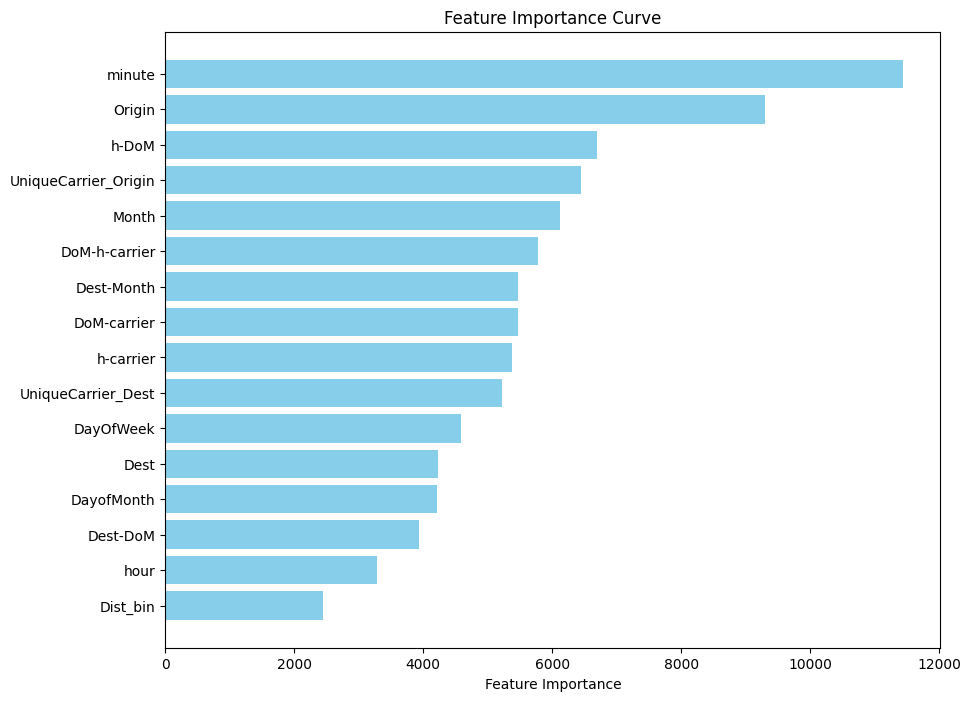

In [ ]:
# Plot feature importance
feature_importances = model_lgb.feature_importances_
features = X_train.columns

# Create a DataFrame for easy plotting
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Curve')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [ ]:
print(importances_df)

                 Feature  Importance
9                 minute       11270
11                 h-DoM        6384
0                  Month        6088
6   UniqueCarrier_Origin        5956
3                 Origin        5875
16         DoM-h-carrier        5724
13           DoM-carrier        5499
12             h-carrier        5225
7     UniqueCarrier_Dest        5077
5                  Route        5068
17            Dest-Month        4517
2              DayOfWeek        4330
1             DayofMonth        4072
14              Dest-DoM        3201
15                Dest-h        3174
4                   Dest        3095
8                   hour        3068
10              Dist_bin        2377


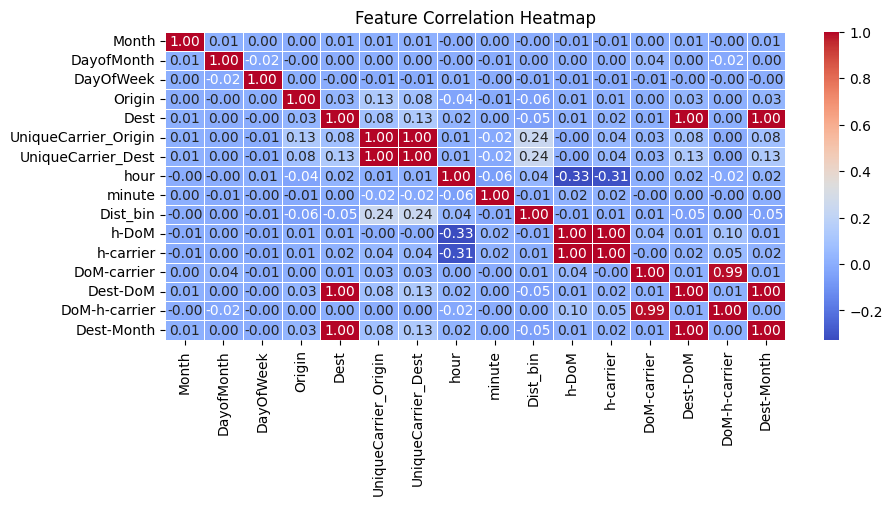

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


## LinearBoost

In [ ]:
all_data = all_data_copy.copy()

In [ ]:
all_data, categ_feats = data_modification(all_data, drop_feats = ['summer','autumn','spring','winter','is_weekend'], original = 1)
all_data = data_encoding(all_data, categ_feats, encoder='Label')
X_train, X_val, y_train, y_val = data_splitting(all_data)

In [ ]:
# Create and train the LinearBoost model
model_lb = LinearBoostClassifier(n_estimators = 3000, learning_rate=0.1, random_state=17)
model_lb.fit(X_train, y_train)

# Make predictions
y_pred = model_lb.predict_proba(X_val)[:, 1]

# Evaluate model
roc_auc = roc_auc_score(y_val, y_pred)
print(f'Validation ROC AUC: {roc_auc:.4f}')

Validation ROC AUC: 0.6363


## Blending and Stacking

In [ ]:
predictions = (predictions1 + predictions2)/2
accuracy = roc_auc_score(y_val.astype(int), predictions)
print('Accuracy Blended: ', accuracy)

# Results

In [ ]:
model = model_ctb
model.fit(X, y.astype(int), cat_features= categ_feat_idx)

In [ ]:
sample = pd.read_csv("../input/flight-delays-fall-2018/sample_submission.csv.zip", compression='zip')
sample.head()

In [ ]:
predictions = model.predict_proba(new_test[feature_columns])[:, 1]

In [ ]:
submission = pd.DataFrame({'id':range(100000),'dep_delayed_15min':predictions})
submission.head(900)

In [ ]:
########## change file name accordingly #################

filename = '/kaggle/working/flight_delay_CatB_AddFeatures3.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)